 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610) </b> </h1> </center>

<b> Programming Assignment - 06 - Isolated digit recognition using Hidden Markov Model (HMM) </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Hidden Markov Models </b> <br>
We expect you to learn to build HMMs in this programming assignment. The skeleton code is provided for you to understand the algorithm. In the later part of the assignment, you need to build an N state HMM to perform isolated digit recognition task\. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.




**Part 1): Understanding the parameters of the Hidden Markov Model (HMM)**

In this part of the assignment, you will understand the functionality of the different parameters of the Hidden Markov Model (HMM). Specifically, we will sample the observations from the HMM model with different parameters to understand their influence. Let us consider the 4-state HMM with 2D observations and assume that the states of the HMM follow the Gaussian distribution. 
 
1. **Understanding the functionality of transition matrix** : 

  i. Change the transition matrix of the HMM i.e skipping some transitions, having different strengths for particular state transitions, etc 

  ii. Sample the sequence of observations with the original and altered transition matrix and plot them

  iii. Write your obervations for each case in the report. 

2. **Understanding the functionality of emission probability** : 

  i. Change the mean of the Gaussian in each state of the HMM i.e means as conrners of sqaures  etc.

  ii. Change covariance matrix of the Gaussian in each state of the HMM i.e Isotropic, diagonal, full etc. 

  ii. Sample the sequence of observations with the original and altered Gausian distribution and plot them
  
  iii. Write your obervations for each case in the report.

In [1]:
#All imports
!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import librosa
import matplotlib.pyplot as plt

     |████████████████████████████████| 129 kB 5.1 MB/s 


In [3]:
def HMM_1(startprob,transmat,means,covars,N):
      #Build an HMM instance 
      model = hmm.GaussianHMM(n_components=N, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

      # Set the above parameters in hmm model ( ) 
      model.startprob_ = startprob
      model.transmat_ = transmat
      model.means_ = means
      model.covars_ = covars

      # Sample observation sequence of 500 length from the HMM model
      X, Z = model.sample(500)
      return X,Z


In [4]:
def plot1(X1,X2,means):
      # Plot the observation sequence
      fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
      ax1.plot(X1[:, 0], X1[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax1.set_title("Original Observation Sequecnce")
      ax2.plot(X2[:, 0], X2[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax2.set_title("Altered Observation Sequecnce")

      # Indicate the component numbers
      for i, m in enumerate(means):
        ax1.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        ax2.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()

Part1

No Diagonal

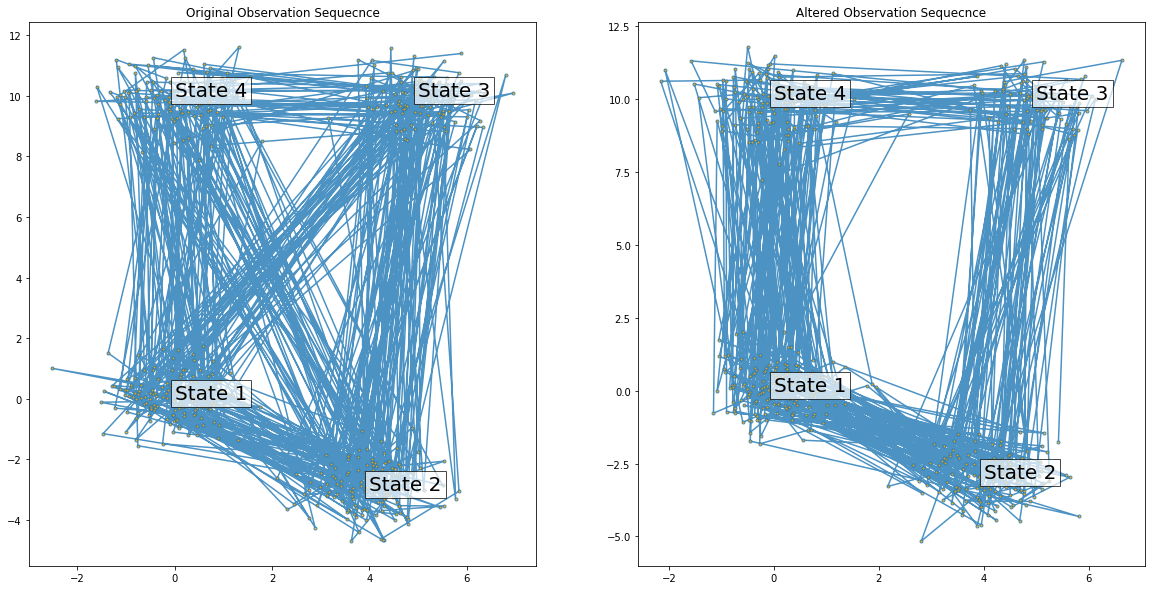

In [5]:
      #Set the prior probabilities. Note: It should follow the axioms of probability.
      startprob = np.array([0.1 ,0.3, 0.4, 0.2 ])

      #Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
      means = np.array([[0.0, 0.0], [4.0, -3.0], [5.0, 10.0], [0.0,10.0]])

      #Initialize the covariance of the Gaussians in each state 
      covars = 0.5*np.tile(np.identity(2), (4,1,1))

      #Initialize the 1st transition matrix of the HMM 
      transmat1 = np.array([[0.4, 0.2, 0.1,0.3],
                          [0.3, 0.2, 0.4, 0.1],
                          [0.2, 0.4, 0.2, 0.2],
                          [0.3, 0.3, 0.2, 0.2] ])
      
      X1,Z1 = HMM_1(startprob,transmat1,means,covars,N=4)

      #Initialize the 2nd transition matrix of the HMM 
      transmat2 = np.array([[0.3, 0.4, 0.0, 0.3],
                      [0.3, 0.4, 0.3, 0.0],
                      [0.0, 0.4, 0.2, 0.4],
                      [0.6, 0.0, 0.1, 0.3] ])
      
      X2,Z2 = HMM_1(startprob,transmat2,means,covars,N=4)

      # Plot the observation sequence
      fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
      ax1.plot(X1[:, 0], X1[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax1.set_title("Original Observation Sequecnce")
      ax2.plot(X2[:, 0], X2[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax2.set_title("Altered Observation Sequecnce")

      # Indicate the component numbers
      for i, m in enumerate(means):
        ax1.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        ax2.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()


Only Diagonal

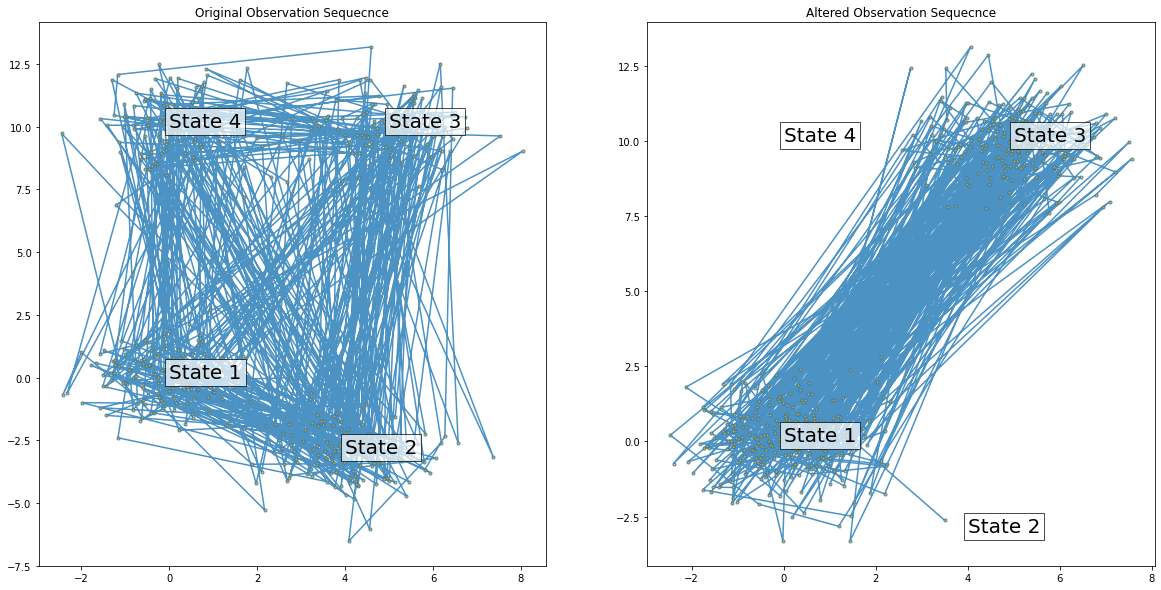

In [6]:
      #Set the prior probabilities. Note: It should follow the axioms of probability.
      startprob = np.array([0.1 ,0.3, 0.4, 0.2 ])

      #Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
      means = np.array([[0.0, 0.0], [4.0, -3.0], [5.0, 10.0], [0.0,10.0]])

      #Initialize the covariance of the Gaussians in each state 
      covars = np.tile(np.identity(2), (4,1,1))

      #Initialize the 1st transition matrix of the HMM 
      transmat1 = np.array([[0.4, 0.2, 0.1,0.3],
                          [0.3, 0.2, 0.4, 0.1],
                          [0.2, 0.4, 0.2, 0.2],
                          [0.3, 0.3, 0.2, 0.2] ])
      
      X1,Z1 = HMM_1(startprob,transmat1,means,covars,N=4)

      #Initialize the 2nd transition matrix of the HMM 
      transmat2 = np.array([[0.5, 0.0, 0.5, 0.0],
                      [0.6, 0.0, 0.0, 0.4],
                      [0.7, 0.0, 0.3, 0.0],
                      [0.8, 0.2, 0.0, 0.0] ])
      means1 = np.array([ [8.0,0.0] , [0.0,2.0] , [-8.0,0.0], [0.0,-2.0]  ])
      transmat22 = np.array([[0.8,0,0.2,0],[0,0.5,0,0.5],[0.3,0,0.7,0],[0,0.1,0,0.9]])
      X2,Z2 = HMM_1(startprob,transmat2,means,covars,N=4)

      # Plot the observation sequence
      fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
      ax1.plot(X1[:, 0], X1[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax1.set_title("Original Observation Sequecnce")
      ax2.plot(X2[:, 0], X2[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax2.set_title("Altered Observation Sequecnce")

      # Indicate the component numbers
      for i, m in enumerate(means):
        ax1.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        ax2.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()


State 2

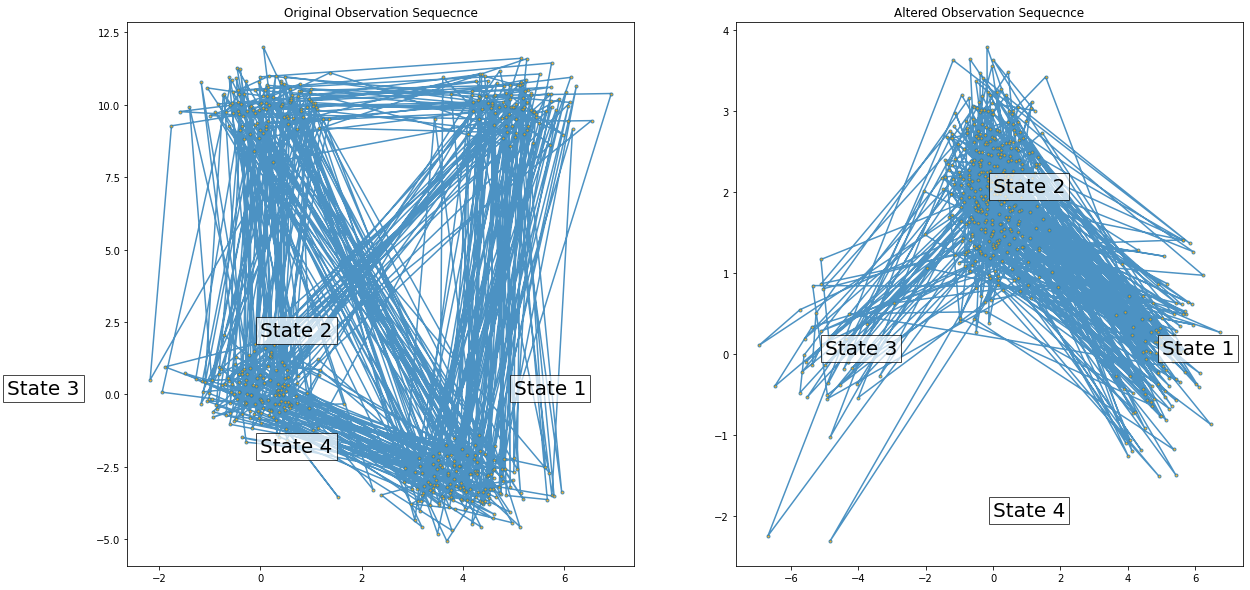

In [7]:
      #Set the prior probabilities. Note: It should follow the axioms of probability.
      startprob = np.array([0.1 ,0.3, 0.4, 0.2 ])

      #Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
      means1 = np.array([[0.0, 0.0], [4.0, -3.0], [5.0, 10.0], [0.0,10.0]])

      #Initialize the covariance of the Gaussians in each state 
      covars = 0.5*np.tile(np.identity(2), (4,1,1))

      #Initialize the 1st transition matrix of the HMM 
      transmat1 = np.array([[0.4, 0.2, 0.1,0.3],
                          [0.3, 0.2, 0.4, 0.1],
                          [0.2, 0.4, 0.2, 0.2],
                          [0.3, 0.3, 0.2, 0.2] ])
      
      X1,Z1 = HMM_1(startprob,transmat1,means,covars,N=4)

      #Initialize the 2nd transition matrix of the HMM 
      transmat22 = np.array([[0.5, 0.0, 0.0, 0.0],
                      [0.6, 0.0, 0.0, 0.4],
                      [0.7, 0.0, 0.3, 0.0],
                      [0.8, 0.2, 0.0, 0.0] ])
      
      means = np.array([ [5.0,0.0] , [0.0,2.0] , [-5.0,0.0], [0.0,-2.0]  ])
      transmat2 = np.array([[0,1,0,0],[0.3,0.6,0.1,0],[0.1,0.7,0.2,0],[0.2,0.6,0.2,0]])
      X2,Z2 = HMM_1(startprob,transmat2,means,covars,N=4)

      # Plot the observation sequence
      fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
      ax1.plot(X1[:, 0], X1[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax1.set_title("Original Observation Sequecnce")
      ax2.plot(X2[:, 0], X2[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax2.set_title("Altered Observation Sequecnce")

      # Indicate the component numbers
      for i, m in enumerate(means):
        ax1.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        ax2.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()


Part2_1

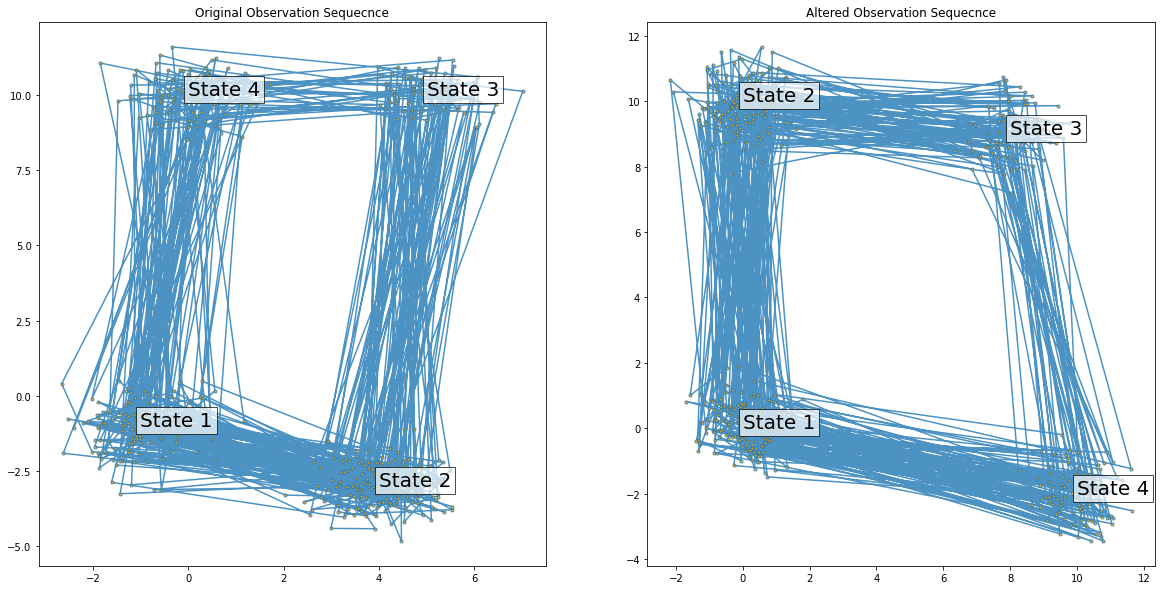

In [8]:
      #Set the prior probabilities. Note: It should follow the axioms of probability.
      startprob = np.array([0.1 ,0.3, 0.4, 0.2 ])

      #Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
      means1 = np.array([[-1.0, -1.0], [4.0, -3.0], [5.0, 10.0], [0.0,10.0]])

      means2 = np.array([[0.0, 0.0], [0.0, 10.0], [8.0, 9.0], [10.0,-2.0]])

      #Initialize the covariance of the Gaussians in each state 
      covars = 0.5*np.tile(np.identity(2), (4,1,1))

      #Initialize the 1st transition matrix of the HMM 
      transmat1 = np.array([[0.4, 0.2, 0.1,0.3],
                          [0.3, 0.2, 0.4, 0.1],
                          [0.2, 0.4, 0.2, 0.2],
                          [0.3, 0.3, 0.2, 0.2] ])
      
      #Initialize the 2nd transition matrix of the HMM 
      transmat2 = np.array([[0.3, 0.4, 0.0, 0.3],
                      [0.3, 0.4, 0.3, 0.0],
                      [0.0, 0.4, 0.2, 0.4],
                      [0.6, 0.0, 0.1, 0.3] ])
      
      X1,Z1 = HMM_1(startprob,transmat2,means1,covars,N=4)
      
      X2,Z2 = HMM_1(startprob,transmat2,means2,covars,N=4)

      # Plot the observation sequence
      fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
      ax1.plot(X1[:, 0], X1[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax1.set_title("Original Observation Sequecnce")
      ax2.plot(X2[:, 0], X2[:, 1], ".-", label="observations", ms=6,mfc="orange", alpha=0.8)
      ax2.set_title("Altered Observation Sequecnce")

      # Indicate the component numbers
      for i, m in enumerate(means1):
        ax1.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()

      for i, m in enumerate(means2):
        ax2.text(m[0], m[1], 'State %i' % (i + 1),size=20,bbox=dict(alpha=.7, facecolor='w'))
        fig.show()




Part2_2

In [23]:
def HMM_2(startprob,transmat,means,covars,N):
      #Build an HMM instance 
      model = hmm.GMMHMM(n_components=4, n_mix=10, covariance_type='diag')#hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

      # Set the above parameters in hmm model ( ) 
      model.startprob_ = startprob
      model.transmat_ = transmat
      model.means_ = means
      model.covars_ = covars

      # Sample observation sequence of 500 length from the HMM model
      X, Z = model.sample(500)
      return X,Z


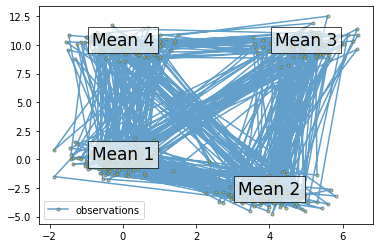

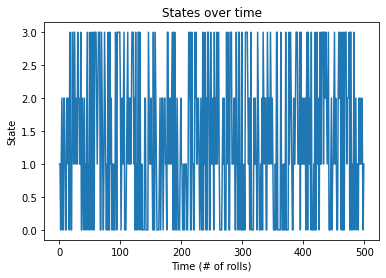

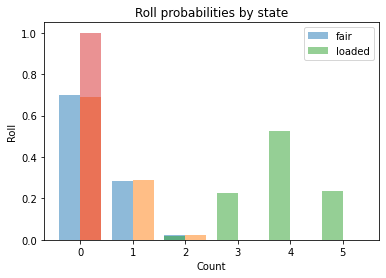

In [15]:
#You can use the built in hmm functions to generate the samples
#Set different types of transition matrix as initialization and generate the observations
#Let us use the four state hmm

#Set the prior probabilities. Note: It should follow the axioms of probability.
startprob = np.array([0.1 ,0.3, 0.4, 0.2 ])

#Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
means = np.array([[0.0, 0.0], [4.0, -3.0], [5.0, 10.0], [0.0,10.0]])

#Initialize the covariance of the Gaussians in each state 
covars = 0.5*np.tile(np.identity(2), (4,1,1))

#Initialize the transition matrix of the HMM 
transmat = np.array([[0.4, 0.2, 0.1,0.3],
                     [0.3, 0.2, 0.4, 0.1],
                     [0.2, 0.4, 0.2, 0.2],
                     [0.3, 0.3, 0.2, 0.2] ])

#Build an HMM instance 
model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

# Set the above parameters in hmm model ( ) 
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars


# Sample observation sequence of 500 length from the HMM model
X, Z = model.sample(500)


# Plot the observation sequence
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Mean %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()

#model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians


# simulate the loaded dice rolls
rolls, gen_states = model.sample(30000)

# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='fair', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='loaded', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()


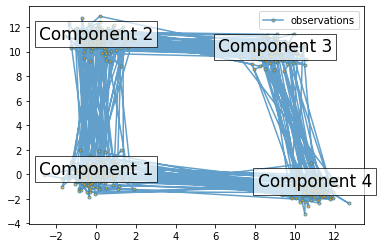

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Component %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()

In [ ]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    # define our hidden Markov model
    model = hmm.GaussianHMM(n_components=n_components,
                            covariance_type='full', n_iter=10)
    model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    models.append(model)
    scores.append(model.score(X[X.shape[0] // 2:]))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)

In [ ]:
print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{model.transmat_.round(3)}\n\n')

In [ ]:
scores = list()
models = list()
for n_components in range(1,11,1):
    # define our hidden Markov model
    model = hmm.GaussianHMM(n_components=n_components,
                            covariance_type='full', n_iter=10)
    model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    models.append(model)
    scores.append(model.score(X[X.shape[0] // 2:]))
    #print("Model %d"%n_components)
    print(f'Model {n_components}'f' Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)
print("states",states)
print("Z",Z)

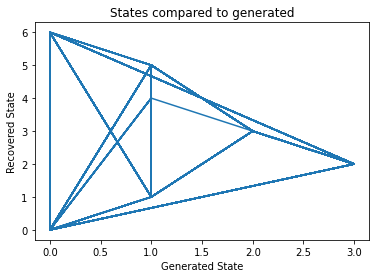

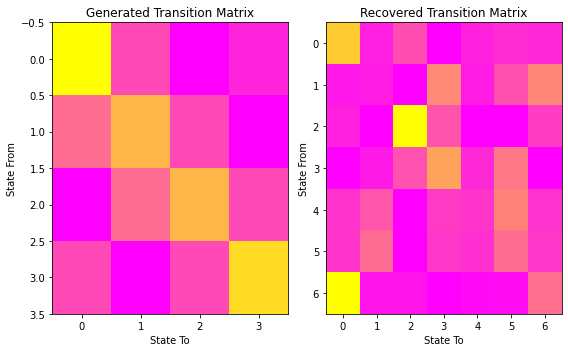

In [29]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

# plot the transition matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()

**Part 2): Isolated Digit Recognition**

In this part of assignment you have to implement the isolated digit recognition system using HMM.
1. Record 5 to 10 repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine (for testing on recorded data). (The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.)
2. Compute MFCC features ( sequence of observations). (The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.)
3. Train a N state HMM model for each digit and store the model
3. Compute the probability of generating test observation sequence given the trained model of the digits. P(O/λw)
4. Get the predicted label from P(O/λw) where 0<=w<=9
5. Repeat the above experiment by increasing number of states (N) in word HMM ranging from 5 to 15. Report your accuracy and observations.
6. Repeat the above experiment with varying the number of states across the digits i.e you may use large number of states for large digits. Report the accuracy and observations.
7. Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. Write the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts and report your analysis in the report section.
7. Create a confusion matrix and report the most confusing digits.
8. Compare the performance with that obtained using DTW algorithm (in previous assignment).

[link to multi speaker digit data base](https://drive.google.com/drive/folders/1faRFWAkGA8tEm_g5VbDyZCvmsn05CWT6?usp=sharing)

**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [30]:
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import scipy.io.wavfile as wav
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

def mfcc_delta_delta2(data):
    #Compute MFCC features ( delta and delta+delta ) ( you can use built in functions )
    y, sr = librosa.load(data)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_delta = librosa.feature.delta(mfcc,width = 5)
    mfcc_delta2 = librosa.feature.delta(mfcc, width = 5,order=2)
    # Append delta and delta-delta features to original features 
    MFCCs = np.vstack((mfcc,mfcc_delta))
    MFCCs = np.vstack((mfcc,mfcc_delta2))
    return MFCCs.T


**Write a function to train Hidden Markov Model (HMM) and return the trained models**

In [137]:
def MIX_HMM(TrainingDataset):
    #Input trainng dataset
    #Output trained HMM models
    #You may use "hmm.GMMHMM" or "hmm.GaussianHMM" function and fit method to train the models 
    #Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base.
    Train_features = [] 
    for data in TrainingDataset:
      Train_features.append(MFCC(data))
    Y = np.row_stack(Train_features)
    modelm = hmm.GMMHMM(n_components=4,n_mix=1)
    modelm.fit(Y)
    #Return the trained model
    return modelm

**Write a function to perform isolated digit recognition**

In [33]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf
drive.mount('/content/drive')

Mounted at /content/drive


In [153]:
def TrainTestSplit(datadir,TrainPercentage):
    #Takes input as the data set location and percentage of training data to be used
    data_files=[]
    for root, dirs, files in os.walk(datadir):
        for file in files:
            if file.endswith(".wav"):
              if os.path.splitext(file)[1] == '.wav':
                 data_files.append(os.path.join(root, file))
    print(len(data_files))

    # Get train and test set
    N = int(len(data_files)*TrainPercentage)
    np.random.shuffle(data_files)     
    train = data_files[:N]
    test = data_files[N:]

    #Return the data set 
    return train,test


trainDir = '/content/drive/MyDrive/Colab Notebooks/PRML_Assignment-6/My_Recordings/' #Change this location
train,test  = TrainTestSplit(trainDir,TrainPercentage=0.8)
print(len(train),len(test))

60
48 12


In [176]:
def IsolatedDigitRecognition(trainDir):
    #Load data from the data directory ( use TrainTestSplit function to get separate splits )
    train,test = TrainTestSplit(trainDir,TrainPercentage=0.7) # Pass the arguments


    #Train HMM models for all the digits ( zero,one,two,three,four,five,six,seven,eight,nine and ten )
    Models = []
    for i in range(10):
      data = []
      for trains in train:
          if trains[-5] == str(i):
            #print(trains)
            data.append(trains)
      Model_Mix = MIX_HMM(data)
      Models.append(Model_Mix)
    print("Models",len(Models))
    #Testing
    count = 0
    accuracy = 0
    confusion_matrix = np.zeros((10,10))
    #Iterate through the test data set
    for tests in test:
      prob = []

      #Extract the features for test speech signal
      test_features = MFCC(tests)

      #Compute the probability of generating sequece of observations ( test speech signal MFCC features ) given the trained hmm models of the digits p(O/Trained word model)
      for m in range(10):
        prob.append(Models[m].score(test_features))

      #Get the digit model achieving highest probability in generating the sequence
      pred = np.argmax(np.array(prob))
      print(tests[-5], pred)
      
      if tests[-5]==str(pred):
        count+=1
      accuracy = 100*float(count)/len(test) 
      print("Accuracy : %.2f"%accuracy)

      index = ord(tests[-5]) - 48
      confusion_matrix[index,pred] += 1

    return accuracy,confusion_matrix
  # We have original labels of the test data and predicted labels from the Hidden Markov Models (HMM)
  # Compute the test accuracy and report in the observations

trainDir = '/content/drive/MyDrive/Colab Notebooks/PRML_Assignment-6/My_Recordings/' #Change this location
accuracy,confusion_matrix =  IsolatedDigitRecognition(trainDir)
print(accuracy)

60
Models 10
7 7
Accuracy : 5.56
1 1
Accuracy : 11.11
9 9
Accuracy : 16.67
8 8
Accuracy : 22.22
8 8
Accuracy : 27.78
6 6
Accuracy : 33.33
7 5
Accuracy : 33.33
1 1
Accuracy : 38.89
4 5
Accuracy : 38.89
5 5
Accuracy : 44.44
1 1
Accuracy : 50.00
8 8
Accuracy : 55.56
2 2
Accuracy : 61.11
3 3
Accuracy : 66.67
1 1
Accuracy : 72.22
6 6
Accuracy : 77.78
2 5
Accuracy : 77.78
2 2
Accuracy : 83.33
83.33333333333333


Comfusion Matrix

Confusion Matrix : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


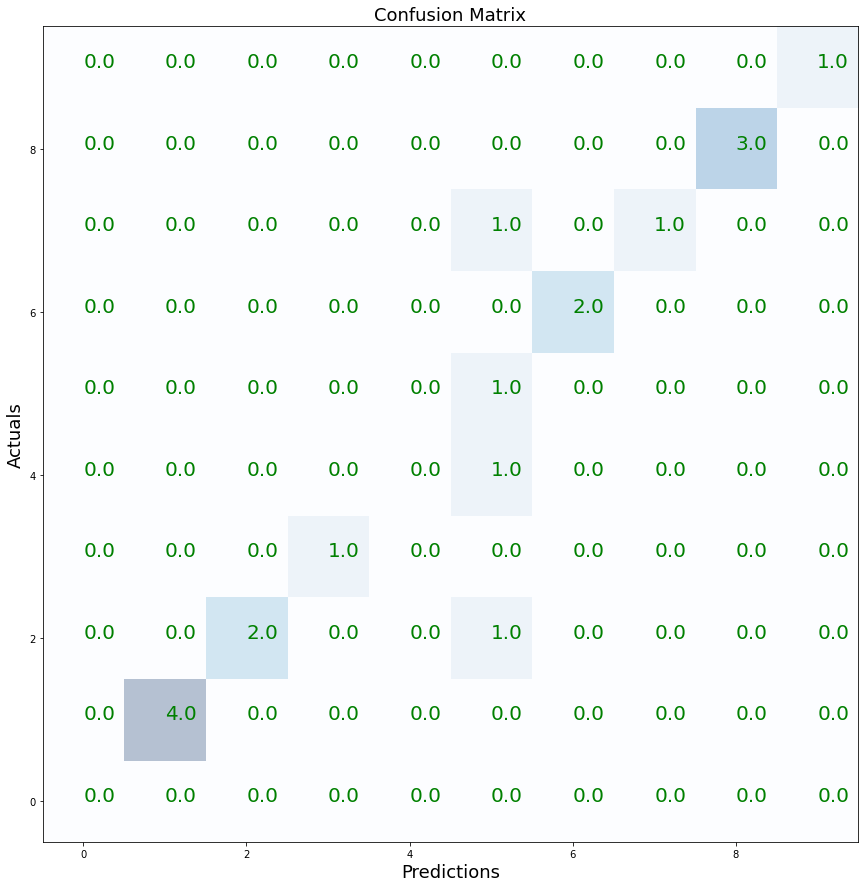

In [178]:
print('Confusion Matrix : \n',confusion_matrix)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3,origin = "lower")
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j],color = "green",size=20)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Multi-Speaker

In [189]:
def TrainTestSplit_Multi(datadir,TrainPercentage):
    #Takes input as the data set location and percentage of training data to be used
    data_files= []
    for data in os.listdir(datadir):
      if os.path.splitext(data)[1] == '.wav':
        data_files.append(data)
    print(len(data_files))

    # Get train and test set
    N = int(len(data_files)*TrainPercentage)
    np.random.shuffle(data_files)     
    train = data_files[:N]
    test = data_files[N:]

    #Return the data set 
    return train,test

trainDir = '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/' #Change this location
train,test  = TrainTestSplit_Multi(trainDir,TrainPercentage=0.8)
print(len(train),len(test))

1999
1599 400


In [190]:
def HGMM_2(TrainingDataset,trainDir):
  #Input trainng dataset
  #Output trained HMM models
  #You may use "hmm.GMMHMM" or "hmm.GaussianHMM" function and fit method to train the models 
  #Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. 
  features=[]
  for i in TrainingDataset:
    features.append(mfcc_delta_delta2(trainDir+i))
  Features = np.row_stack(features)
  model=hmm.GMMHMM(n_components=4,n_mix=1)
  model.fit(Features)
  #Return the trained model
  return model

In [191]:
def mfcc_delta_delta2(data):
    #Compute MFCC features ( delta and delta+delta ) ( you can use built in functions )
    y, sr = librosa.load(data)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_delta = librosa.feature.delta(mfcc,width = 5)
    mfcc_delta2 = librosa.feature.delta(mfcc, width = 5,order=2)
    # Append delta and delta-delta features to original features 
    MFCCs = np.vstack((mfcc,mfcc_delta))
    MFCCs = np.vstack((mfcc,mfcc_delta2))
    return MFCCs.T

In [195]:
def IsolatedDigitRecognition_multi(trainDir):
  #trainDir = '/content/drive/MyDrive/Speech/' #Location to your data directory in google drive
  #Load data from the data directory ( use TrainTestSplit function to get separate splits )
  Train_data, Test_data = TrainTestSplit_Multi(trainDir,0.8) # Pass the arguments
  print("Test",Test_data)
  #Train HMM models for all the digits ( zero,one,two,three,four,five,six,seven,eight,nine and ten )
  models=[]
  for i in range(10):
    temp = []
    for j in Train_data:
      #print(j[0])
      if j[0]==str(i):
        temp.append(j)
    print(f"Digit {i}",temp)
    models.append(HGMM_2(temp,trainDir)) 
  #Testing 
  #Iterate through the test data set
  score = 0
  accuracy = 0
  confusion_matrix = np.zeros((10,10))
  for i in Test_data:
    ll = []
    #Extract the features for test speech signal
    test_feat = mfcc_delta_delta2(trainDir+i)
    #Compute the probability of generating sequece of observations ( test speech signal MFCC features ) given the trained hmm models of the digits p(O/Trained word model)
    for j in range(10):
      ll.append(models[j].score(test_feat))
    pred = np.argmax(np.array(ll))
    if i[0]==str(pred):
      score+=1
    accuracy =  100*float(score)/len(Test_data) 
    print("Accuracy : %.2f"%accuracy)

    index = ord(i[0]) - 48
    confusion_matrix[index,pred] += 1
  return accuracy,confusion_matrix
  #Get the digit model achieving highest probability in generating the sequence
  # We have original labels of the test data and predicted labels from the Hidden Markov Models (HMM)
  # Compute the test accuracy and report in the observations

trainDir = '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/' #Change this location
acc1 ,confusion_matrix1 =  IsolatedDigitRecognition_multi(trainDir)
print(acc1)

1999
Test ['0_nicolas_35.wav', '9_yweweler_29.wav', '7_jackson_33.wav', '9_jackson_15.wav', '5_yweweler_44.wav', '2_nicolas_42.wav', '1_yweweler_16.wav', '6_yweweler_39.wav', '6_theo_30.wav', '6_theo_49.wav', '1_theo_18.wav', '7_yweweler_30.wav', '2_theo_11.wav', '4_jackson_33.wav', '5_theo_8.wav', '8_nicolas_29.wav', '4_yweweler_26.wav', '0_jackson_47.wav', '7_jackson_43.wav', '0_yweweler_3.wav', '5_theo_22.wav', '5_nicolas_24.wav', '9_yweweler_5.wav', '5_yweweler_37.wav', '6_nicolas_19.wav', '4_nicolas_28.wav', '9_jackson_22.wav', '8_theo_16.wav', '8_nicolas_39.wav', '6_jackson_33.wav', '5_nicolas_42.wav', '8_yweweler_3.wav', '3_jackson_23.wav', '8_jackson_14.wav', '6_nicolas_26.wav', '0_jackson_26.wav', '8_theo_15.wav', '4_jackson_18.wav', '7_nicolas_42.wav', '6_yweweler_13.wav', '1_theo_42.wav', '6_theo_1.wav', '9_jackson_28.wav', '2_theo_40.wav', '4_theo_23.wav', '7_yweweler_5.wav', '9_jackson_39.wav', '9_nicolas_36.wav', '2_jackson_38.wav', '2_theo_9.wav', '2_theo_49.wav', '4_jac

Confusion Matrix : 
 [[51.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0. 43.  0.  3.  0.  2.  0.  0.  0.  0.]
 [ 0.  0. 32.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 31.  0.  0.  1.  0.  3.  0.]
 [ 0.  0.  0.  0. 34.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 28.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0. 42.  0.  4.  0.]
 [ 0.  0.  0.  1.  0.  1.  0. 35.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 39.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0. 40.]]


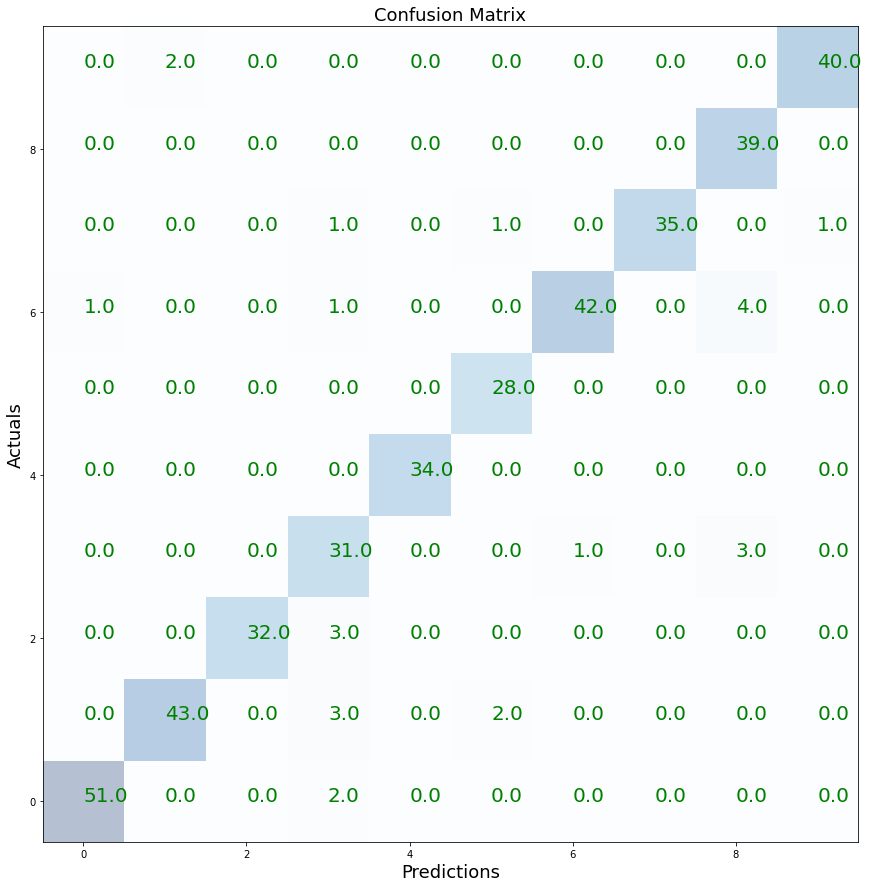

In [196]:
print('Confusion Matrix : \n',confusion_matrix1)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3,origin = "lower")
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j],color = "green",size=20)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Report**

1. We can see that Accuracy increased tremendously using HMM rather than DTW, DTW was giving very low accuracy for multi speaker data but using HMM we got nearly 90 % accuracy.

2. Means HMM models are able to deals with the statistical variations due to change in speaker but DTW is not able to do that.

3. Here my record data was like recordi_j.wav format where j is digit and i is it's frequency.